# Steps

Handling the data

Summarizing data

Making a prediction

Making all the prediction

Evaluate Accuracy

tying all together

In [46]:
import csv
import math
import random
import pandas as pd
import numpy as np

In [47]:
def loadcsv(file):
    dataset = pd.read_csv(file)
    dataset = dataset.values
    return dataset

#r'C:\Users\TMR\Desktop\DataScience\DataSets\pima-indians-diabetes.csv'

In [48]:
#Split data set into two part randomly
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]


In [49]:
def separateByClass(dataset):
    separated = {}
    #print("")
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [50]:
def mean(arr):
    return sum(arr)/float(len(arr))#arr=numbers

In [51]:
def stdev(arr):
    avg=mean(arr)
    variance=sum([pow(x-avg,2) for x in arr])/float(len(arr)-1)
    return math.sqrt(variance)
#numbers = [1,2,3,4,5]
#print(numbers)
#print(mean(numbers))
#print(std(numbers))

In [52]:
#calculate mean and std classwise for each feature
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [53]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries
#dataset = [[1,20,1], [2,21,0], [3,22,1], [4,22,0]]
#summary = summarizeByClass(dataset)
#print('Summary by class value:',summary);

In [54]:


#defining pdf
#calculating class prob.s

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [55]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities


#summaries = {0:[(33, 2)], 1:[(9, 4)]}
#inputVector = [33, '?']
#probabilities = calculateClassProbabilities(summaries, inputVector)
#print('Probabilities for each class:',probabilities)


In [56]:
#predicting the best label
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

#summaries = {'A':[(1, 0.5)], 'B':[(20, 5.0)]}
#inputVector = [1.1, '?']
#result = predict(summaries, inputVector)
#print('Prediction:',result)

In [57]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

#summaries = {'A':[(1, 0.5)], 'B':[(20, 5.0)]}
#testSet = [[1.1, '?'], [19.1, '?']]
#predictions = getPredictions(summaries, testSet)
#print('Predictions:',predictions)

In [58]:
#This is an extra part to plot --- not need
def sel_color(l):
    if l[-1]==0:
        return 'red'
    if l[-1]==1:
        return 'blue'

def sel_color_2(l):
    if l[0]==0:
        return 'red'
    if l[0]==1:
        return 'blue'

In [59]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        plt.scatter(testSet[x][1],testSet[x][2],marker='>', c=sel_color(testSet[x]))
        plt.scatter(testSet[x][1],testSet[x][2],marker='<', c=sel_color_2(predictions))
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

#testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
#predictions = ['a', 'a', 'a']
#accuracy = getAccuracy(testSet, predictions)
#print('Accuracy:',accuracy)


{1.0: [(4.745098039215686, 3.7144008779299265), (139.58823529411765, 31.351291938771496), (71.88725490196079, 21.134148919589702), (22.397058823529413, 17.838194235204345), (97.24019607843137, 131.78601162139572), (35.31029411764706, 7.213612058313572), (0.5597941176470589, 0.3825384320364842), (37.161764705882355, 11.32407996343436)], 0.0: [(3.273838630806846, 3.014397670685377), (110.3398533007335, 26.07764426420806), (68.05378973105134, 17.914339791395083), (19.850855745721272, 14.75966800138143), (72.73349633251834, 102.36317926082077), (30.26968215158927, 7.608603241139446), (0.4283520782396086, 0.30324066390722704), (31.151589242053788, 11.749489086409202)]}
Accuracy: 73.37662337662337


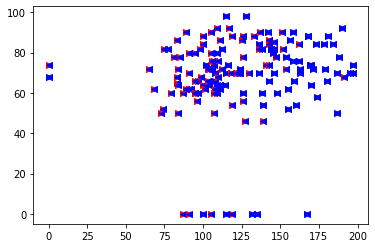

In [60]:
#sum all and create main function
def main():
    filename=r"C:\Users\TMR\Desktop\DataScience\DataSets\pima-indians-diabetes.csv"
    dataset=loadcsv(filename)
    splitRatio = 0.8
    trainingSet, testSet = splitDataset(dataset, splitRatio)
   # print("trinnnnnnnnnnnnnnnnnnnnnnnnnn",trainingSet)
    #print("testtttttttt",testSet)
    summaries = summarizeByClass(trainingSet)
    print(summaries)
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy:',accuracy)
    plt.show()

main()